In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv("Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Explorartary data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
data[data.duplicated()]

,YearsExperience,Salary


C:\Users\anjli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

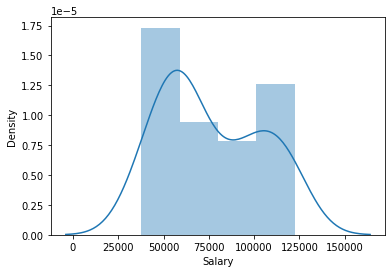

In [12]:
#visualizing the data 
sns.distplot(data["Salary"])


C:\Users\anjli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

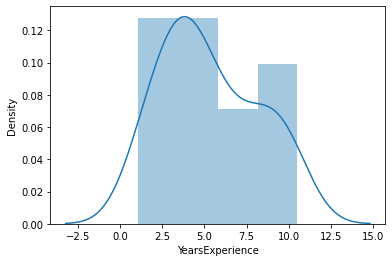

In [13]:
sns.distplot(data["YearsExperience"])

Text(0, 0.5, 'salary')

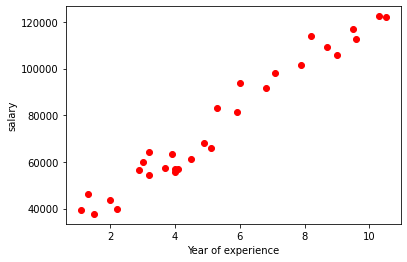

In [15]:
#checking the relation of x and y variable
plt.plot(data["YearsExperience"],data["Salary"],"ro")
plt.xlabel("Year of experience")
plt.ylabel("salary")

{'whiskers': [<matplotlib.lines.Line2D at 0x21def8a7788>,
 'caps': [<matplotlib.lines.Line2D at 0x21def71ad48>,
 'boxes': [<matplotlib.lines.Line2D at 0x21def887408>],
 'medians': [<matplotlib.lines.Line2D at 0x21def938d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x21def938f48>],
 'means': []}

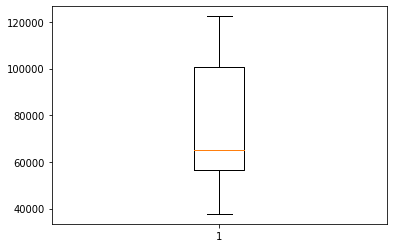

In [16]:
plt.boxplot(data["Salary"])   # checking the outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x21defb21ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x21defb2bec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21defb2b348>],
 'medians': [<matplotlib.lines.Line2D at 0x21defb94088>],
 'fliers': [<matplotlib.lines.Line2D at 0x21defbaed88>],
 'means': []}

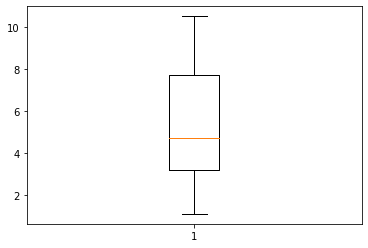

In [17]:
plt.boxplot(data["YearsExperience"])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

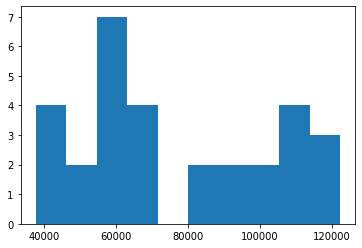

In [18]:
plt.hist(data['Salary'])

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

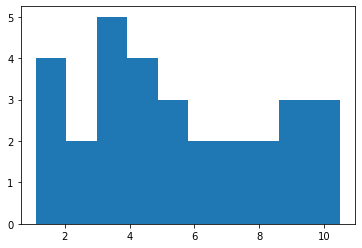

In [19]:
plt.hist(data["YearsExperience"])

In [20]:
#checking the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


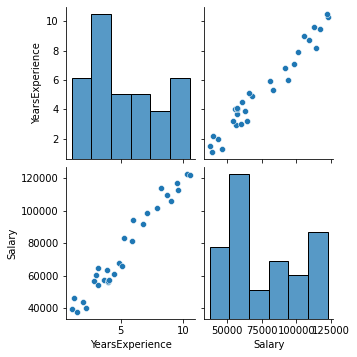

In [22]:
sns.pairplot(data)

In [23]:
#Observation: The dependant variable is strongly correlated

In [24]:
#Building the first slr model
model_1=smf.ols("Salary~YearsExperience",data=data).fit()

In [27]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        00:54:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#the r square value is very high
#predicting the salary data using  the whole yearofexperience
pred=model_1.predict(data["YearsExperience"])

In [29]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [30]:
model_1.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [31]:
#calculating the rmse value of this model
rmse=np.sqrt(np.mean(np.array((data['YearsExperience'])-np.array(pred))**2))

In [32]:
rmse

80440.84508275457

Text(0, 0.5, 'Salary')

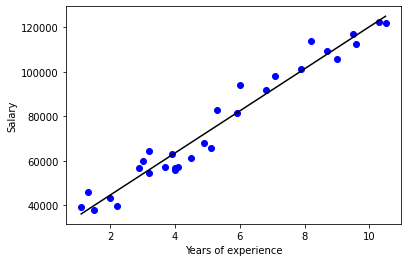

In [34]:
#Visualizing the model and the line
plt.scatter(x=data['YearsExperience'],y=data['Salary'],color='blue')
plt.plot(data['YearsExperience'],pred,color='black')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Standardized Residual')

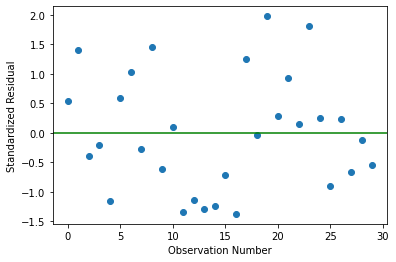

In [36]:
#observing the residual after standardizing it
plt.plot(model_1.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

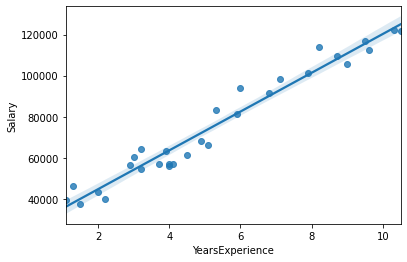

In [40]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [41]:
#Building anoether model by changing trying to fit the line by transforming the independant variable
#log transformation of independant variable

model_2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.25e-13
Time:                        01:01:52   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Checking the RMSE of this model
rmse_2 = np.sqrt(np.mean((np.array(data['YearsExperience'])-np.array(model_2.predict(data["YearsExperience"])))**2))
rmse_2

79974.15496099806

In [46]:
#Building another model by transforming the dependant variable using log to experiment with the best line fit
model_3 = smf.ols("np.log(Salary)~YearsExperience", data=data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           7.03e-18
Time:                        01:03:01   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Checking the RMSE of this model by invering the effects of log and checking its RMSE value
pred_model_3 = np.exp(model_3.predict(data['YearsExperience']))
rmse_3 = np.sqrt(np.mean((np.array(data['YearsExperience'])-np.array(pred_model_3))**2))
rmse_3

80857.92236328169

In [49]:
#Building another model by transforming the dependant variable to its square root
model_4 = smf.ols("np.sqrt(Salary)~YearsExperience", data=data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           9.78e-20
Time:                        01:03:53   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Checking the RMSE of this model by invering the effects of log and checking its RMSE value
pred_model_4 = ((model_4.predict(data['YearsExperience']))**2)
rmse_4 = np.sqrt(np.mean((np.array(data['YearsExperience'])-np.array(pred_model_4))**2))
rmse_4

80444.62166364981

In [52]:
#Building another model by adding another independant variable as the square of the dependant variable
#and transforming dependant variable to log
data["YE_square"] = data.YearsExperience ** 2
model_5 = smf.ols('np.log(Salary)~YearsExperience+YE_square', data=data).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.95e-18
Time:                        01:05:03   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
YE_square          -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Calculating the RMSE
pred_model_5 = np.exp(model_5.predict(data)) #inversing the effect of log
rmse_5 = np.sqrt(np.mean((np.array(data['YearsExperience'])-np.array(pred_model_5))**2))
rmse_5

80259.684799294

In [56]:
#making a dataframe to check which model was best (rsquared should be high and rmse should be low)
model_check = pd.DataFrame({
    "Model": ["model_1", "model_2", "model_3", "model_4", "model_5"], 
    "R squared": [model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared],
    "RMSE": [rmse, rmse_2, rmse_3, rmse_4, rmse_5]
})
model_check

,Model,R squared,RMSE
0,model_1,0.956957,80440.845083
1,model_2,0.853889,79974.154961
2,model_3,0.931967,80857.922363
3,model_4,0.949835,80444.621664
4,model_5,0.948611,80259.684799


In [57]:
#Observation: the Rsquared of the first model is the highest. It looks like the best model

In [58]:
#dropping the YE_squared column that was made before and adding the prediction of model
data = data.drop(['YE_square'],axis=1)
data["Prediction Model 1"] = pred
data

,YearsExperience,Salary,Prediction Model 1
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
